In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import pandas_profiling

In [3]:
test1 = pd.read_csv('titanic_test.csv')
passengerid = test1.PassengerId

In [4]:
train = pd.read_csv('titanic_train.csv',index_col = 0)
test = pd.read_csv('titanic_test.csv',index_col = 0)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


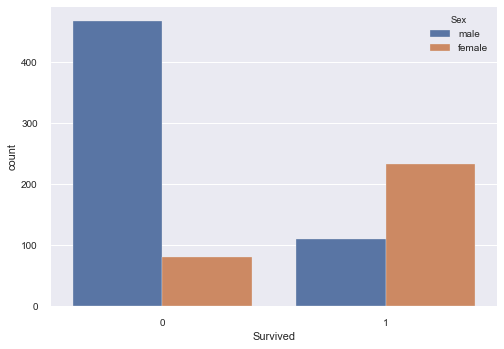

In [6]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

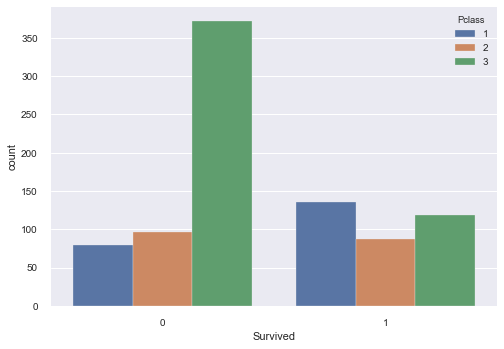

In [7]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

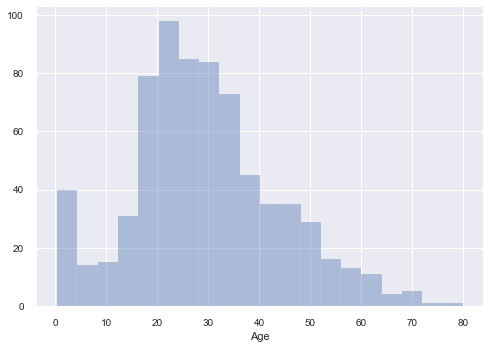

In [8]:
sns.distplot(train['Age'].dropna(), kde= False)

## Missing data


In [9]:
train.isnull().sum().sort_values( ascending = False)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [10]:
test.isnull().sum().sort_values( ascending = False)

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

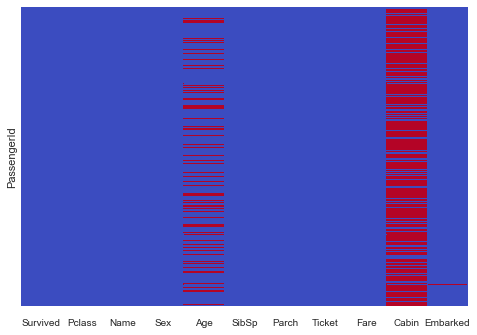

In [11]:
sns.heatmap(train.isnull(), yticklabels= False, cmap ='coolwarm', cbar= False)

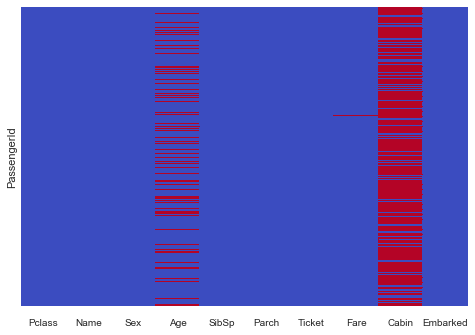

In [12]:
sns.heatmap(test.isnull(), yticklabels= False, cmap ='coolwarm', cbar= False)

In [13]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Missing value in Embark, train_data. 


#### Find the class of Embarked of people who paied 80 for Fare, in Pclass 1 

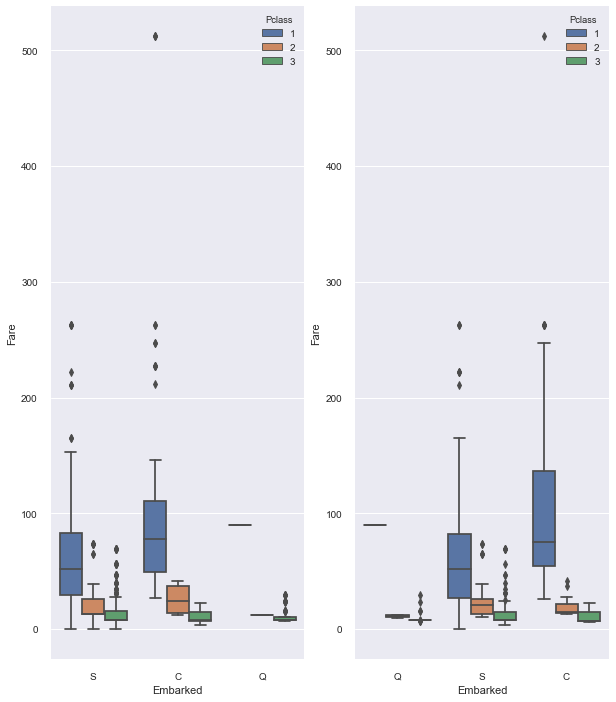

In [14]:
fig,ax = plt.subplots(figsize = (10,12), ncols =2 )
ax1 = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data =train, ax=ax[0])
ax2 =sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data =test, ax=ax[1])

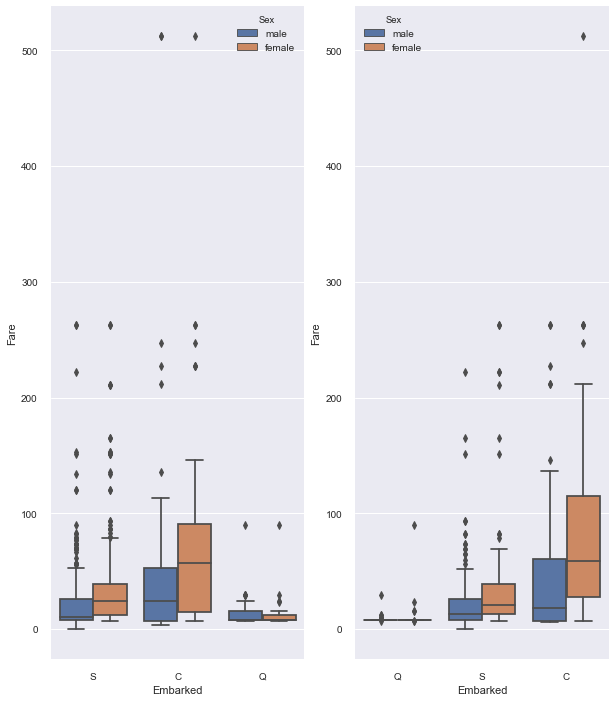

In [15]:
fig,ax = plt.subplots(figsize = (10,12), ncols =2 )
ax3 = sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Sex', data =train, ax=ax[0])
ax4 =sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Sex', data =test, ax=ax[1])

#### From the plot we can see that woman at average of 80 Fare will in C Embarked 

In [16]:
train['Embarked'].fillna('C',inplace=True)

In [17]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


### Missing value in Fare, test_Data

In [18]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [19]:
missing_con = (test.Sex == 'male' )&( test.Pclass == 3 )& (test.Embarked == 'S')

In [20]:
far_mean = test[missing_con].Fare.mean()

In [21]:
test['Fare'].fillna('12',inplace=True)

In [22]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### Missing value in Age, train_data

In [23]:
train = train.drop('Cabin' ,axis = 1)



In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
train['Sex'] = train['Sex'].map({'male':1 , "female":0}).astype(int)
test['Sex'] = test['Sex'].map({'male':1 , "female":0}).astype(int)

In [26]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [27]:
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [29]:
train_fe =train

In [30]:
test = test.drop('Cabin' ,axis = 1)


In [31]:
test_fe =test

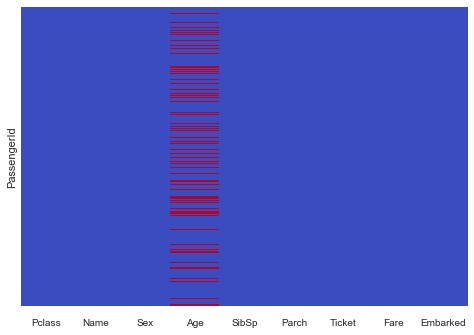

In [32]:
sns.heatmap(test.isnull(), yticklabels= False, cmap ='coolwarm', cbar= False)

In [33]:
train = train.drop(['Ticket'] ,axis = 1)


In [34]:
test = test.drop(['Ticket'] ,axis = 1)

In [36]:
test.Fare = test.Fare.astype(int)


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null int32
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int32
Embarked    418 non-null int32
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 44.5+ KB


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(2), int32(2), int64(4), object(1)
memory usage: 102.6+ KB


In [39]:
train['family_size'] = train['SibSp'] + train.Parch + 1
test['family_size'] = test['SibSp'] + test.Parch + 1
# at least one people in the family_size

In [40]:
def family_group(size):
    a = ''
    if (size <=1):
        a = '0'
    elif (size <=4):
        a = '1'
    else:
        a = '2'
    return a

In [41]:
train['family_group'] = train['family_size'].map(family_group).astype(int)
test['family_group'] = test['family_size'].map(family_group).astype(int)

In [42]:
train['caculated_fare'] = train.Fare / train.family_size


In [43]:
test['caculated_fare'] = test.Fare.astype(int) / test.family_size

In [44]:
def fare_group(fare):
    a = ''
    if (fare <=7.25):
        a = '0'
    elif (fare <=7.8):
        a = '1'
    elif (fare <=15):
        a = '2'
    elif (fare <=24):
        a = '3'
    else:
        a = '4'
    return a

In [45]:
train['fare_group'] = train['caculated_fare'].map(fare_group).astype(int)
test['fare_group'] = test['caculated_fare'].map(fare_group).astype(int)

In [46]:
def alone(family_group):
    a = ''
    if (family_group == 0):
        a = 0
    else:
        a = 1
    return a
    

In [47]:
train['is_alone'] = train['family_group'].map(alone).astype(int)
test['is_alone'] = test['family_group'].map(alone).astype(int)

In [48]:
name_list = list(train['Name'])
titles = []
for name in name_list:
    titles.append(name.split(',')[1].split(' ')[1])
titles[759] = "the Countess."

In [49]:
name_listt = list(test['Name'])
titless = []
for name in name_listt:
    titless.append(name.split(',')[1].split(' ')[1])

In [50]:
import collections
collections.Counter(titles)

Counter({'Capt.': 1,
         'Col.': 2,
         'Don.': 1,
         'Dr.': 7,
         'Jonkheer.': 1,
         'Lady.': 1,
         'Major.': 2,
         'Master.': 40,
         'Miss.': 182,
         'Mlle.': 2,
         'Mme.': 1,
         'Mr.': 517,
         'Mrs.': 125,
         'Ms.': 1,
         'Rev.': 6,
         'Sir.': 1,
         'the Countess.': 1})

In [51]:
collections.Counter(titless)

Counter({'Col.': 2,
         'Dona.': 1,
         'Dr.': 1,
         'Master.': 21,
         'Miss.': 78,
         'Mr.': 240,
         'Mrs.': 72,
         'Ms.': 1,
         'Rev.': 2})

In [52]:
# Convert titles to numerical values
#library collection
counter_list = collections.Counter(titles).most_common()
print("Before:", counter_list)
threshold_to_be_others = 10
# count unique elements with amount > threshold_to_be_others
others_index = 0
for count in counter_list:
    if count[1] > threshold_to_be_others:
        others_index += 1
for rank in range(len(counter_list)):
    if counter_list[rank][1] < threshold_to_be_others:
        titles = [others_index if ele==counter_list[rank][0] else ele for ele in titles]
    else:
        titles = [rank if ele==counter_list[rank][0] else ele for ele in titles]
print("After:", collections.Counter(titles))

Before: [('Mr.', 517), ('Miss.', 182), ('Mrs.', 125), ('Master.', 40), ('Dr.', 7), ('Rev.', 6), ('Major.', 2), ('Mlle.', 2), ('Col.', 2), ('Don.', 1), ('Mme.', 1), ('Ms.', 1), ('Lady.', 1), ('Sir.', 1), ('Capt.', 1), ('the Countess.', 1), ('Jonkheer.', 1)]
After: Counter({0: 517, 1: 182, 2: 125, 3: 40, 4: 27})


In [53]:
counter_listt = collections.Counter(titless).most_common()
print("Before:",counter_listt)
threshold_to_be_others = 10
# count unique elements with amount > threshold_to_be_others
others_index = 0
for count in counter_listt:
    if count[1] > threshold_to_be_others:
        others_index += 1
for rank in range(len(counter_listt)):
    if counter_listt[rank][1] < threshold_to_be_others:
        titless = [others_index if ele==counter_listt[rank][0] else ele for ele in titless]
    else:
        titless = [rank if ele==counter_listt[rank][0] else ele for ele in titless]
print("After:", collections.Counter(titless))

Before: [('Mr.', 240), ('Miss.', 78), ('Mrs.', 72), ('Master.', 21), ('Col.', 2), ('Rev.', 2), ('Ms.', 1), ('Dr.', 1), ('Dona.', 1)]
After: Counter({0: 240, 1: 78, 2: 72, 3: 21, 4: 7})


In [54]:
train['Title'] = pd.DataFrame({'Title': titles}).shift(1)
train['Title'].iloc[-1] = titles[-1]
train["Title"] = train["Title"].astype(int)

C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
new_title_df = pd.DataFrame({'Title': titless})
new_title_df.index = range(892,len(new_title_df)+892)
test['Title'] = new_title_df
test['Title']

PassengerId
892     0
893     2
894     0
895     0
896     2
       ..
1305    0
1306    4
1307    0
1308    0
1309    3
Name: Title, Length: 418, dtype: int64

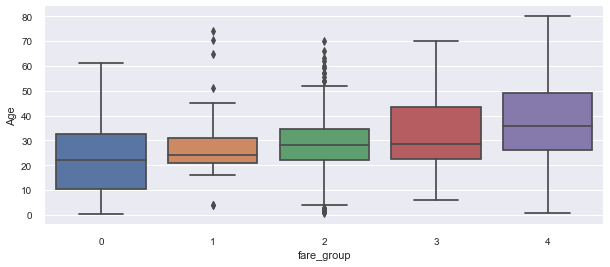

In [57]:
plt.figure(figsize = (10,4))
sns.boxplot(x = 'fare_group', y = 'Age', data = train)

In [58]:
age_0 = round(np.mean(train[train['fare_group']== 0]['Age']))
age_1 = round(np.mean(train[train['fare_group']== 1]['Age']))
age_2 = round(np.mean(train[train['fare_group']== 2]['Age']))
age_3 = round(np.mean(train[train['fare_group']== 3]['Age']))
age_4 = round(np.mean(train[train['fare_group']== 4]['Age']))


In [59]:

def get_null_values(col):

    if pd.isnull(col['Age']):
        
        if col['fare_group'] == 0:
            return age_0
        elif col['fare_group'] == 1:
            return age_1
        elif col['fare_group'] == 2:
            return age_2
        elif col['fare_group'] == 3:
            return age_3
        else:
            return age_4
    return col['Age']
train['Age'] = train[['Age', 'fare_group']].apply(get_null_values, axis = 1)
test['Age'] = test[['Age', 'fare_group']].apply(get_null_values, axis = 1)

In [61]:
train.drop(['family_size','Fare'],axis =1, inplace=True)

In [62]:
test.drop(['family_size','Fare'],axis =1, inplace=True)

In [63]:
train.drop(['SibSp','Parch'],axis =1, inplace=True)

In [64]:
test.drop(['SibSp','Parch'],axis =1, inplace=True)


In [65]:
# test.drop(['Age'],axis =1, inplace=True)
# train.drop(['Age'],axis =1, inplace=True)

In [66]:
test.drop(['Name'],axis =1, inplace=True)
train.drop(['Name'],axis =1, inplace=True)

In [67]:
x_data = train.drop('Survived',axis = 1)
#remeber to add axis = 1

In [68]:
y_data = train['Survived']


In [69]:
y_data.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [70]:
train.Title.describe()

count    891.000000
mean       0.740741
std        1.052077
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Title, dtype: float64

In [71]:
x_data.head()

,Pclass,Sex,Age,Embarked,family_group,caculated_fare,fare_group,is_alone,Title
PassengerId,,,,,,,,,
1,3,1,22.0,0,1,3.62500,0,1,0
2,1,0,38.0,1,1,35.64165,4,1,2
3,3,0,26.0,0,0,7.92500,2,0,1
4,1,0,35.0,0,1,26.55000,4,1,2
5,3,1,35.0,0,0,8.05000,2,0,0


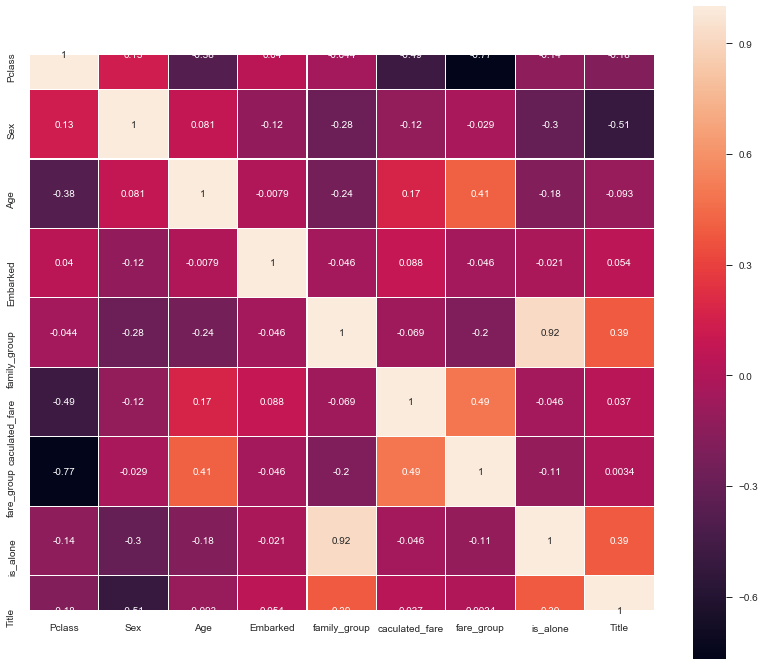

In [72]:
plt.figure(figsize=(14,12))
sns.heatmap(x_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)

In [73]:
# newdata = x_data[['caculated_fare','Sex','Title','Pclass','family_group','Age_group']]

In [74]:

from sklearn.ensemble import RandomForestClassifier
rfc_fi = RandomForestClassifier()
rfc_fi.fit(x_data, y_data)

C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
rfc_fi.feature_importances_

array([0.0474119 , 0.15908191, 0.23734514, 0.02406809, 0.0653435 ,
       0.23662453, 0.03833862, 0.0102805 , 0.18150582])

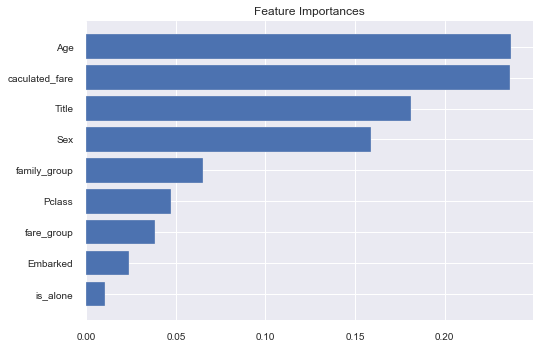

In [76]:
features = x_data.columns
importances = rfc_fi.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

### Model building

In [80]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 666)

In [81]:
feature = X_train.columns

In [82]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


In [83]:
from sklearn.linear_model import LogisticRegression
Logis = LogisticRegression()
model = Logis.fit(X_train, y_train)


C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:

logis_pre = Logis.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, logis_pre))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       159
           1       0.80      0.74      0.77       109

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification).

In [86]:
np.mean((y_test==logis_pre))

0.8208955223880597

In [87]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
rfc_pre = rfc.predict(X_test)

In [89]:
print(classification_report(y_test, rfc_pre))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       159
           1       0.86      0.61      0.72       109

    accuracy                           0.80       268
   macro avg       0.82      0.77      0.78       268
weighted avg       0.81      0.80      0.79       268



In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [91]:
correct_rate =[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pre = knn.predict(X_test)
    correct_rate.append(np.mean((y_test==knn_pre)))

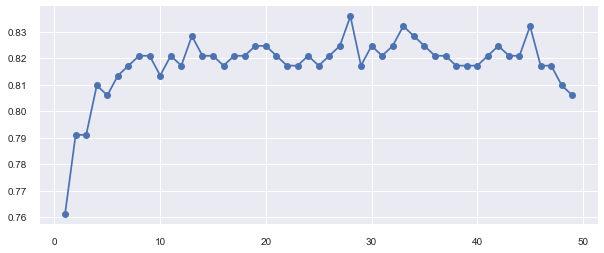

In [92]:
plt.figure(figsize = (10,4))
plt.plot(range(1,50), correct_rate, marker ='o' )

In [93]:
np.max(correct_rate)

0.835820895522388

In [94]:
knn_pre = knn.predict(X_test)

In [95]:
confusion_matrix(y_test, knn_pre)

array([[144,  15],
       [ 37,  72]], dtype=int64)

In [96]:
print(classification_report(y_test, knn_pre))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       159
           1       0.83      0.66      0.73       109

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



# cross validation

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.



accuracies = cross_val_score(LogisticRegression(), X_train,y_train, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.82692308 0.81410256 0.83974359 0.8525641  0.8525641  0.78205128
 0.82051282 0.83333333 0.78846154 0.80128205]
Mean Cross-Validation accuracy score: 0.82115


C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\si

In [99]:
from sklearn.linear_model import ElasticNet

In [100]:
knn = KNeighborsClassifier()
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train,y_train, cv = cv)
    k_scores.append(scores.mean())

print ("Mean accuracy score: {}".format(np.max(k_scores)))

Mean accuracy score: 0.8237179487179487


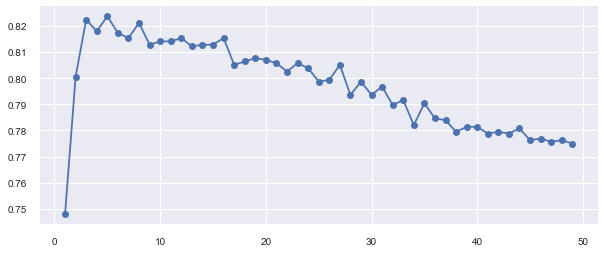

In [101]:
plt.figure(figsize = (10,4))
plt.plot(range(1,50), k_scores, marker ='o' )

In [102]:
from sklearn.ensemble import RandomForestClassifier

rfc_accuracies = cross_val_score(RandomForestClassifier(), X_train,y_train, cv  = cv)

print ("Mean Cross-Validation accuracy score: {}".format(round(rfc_accuracies.mean(),5)))

Mean Cross-Validation accuracy score: 0.80064


C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

In [103]:
from sklearn.svm import SVC
svm_scores = cross_val_score(SVC(kernel= 'linear', random_state=1), X_train,y_train, cv  = cv)
print ("Mean Cross-Validation accuracy score: {}".format(round(svm_scores.mean(),5)))

Mean Cross-Validation accuracy score: 0.81282


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train, y_train)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.832


In [105]:

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet


In [107]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV


### C : float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.



In [109]:
logistic_param = {
    "penalty":["l1","l2"],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}
gsLog = GridSearchCV(LogisticRegression(), param_grid= logistic_param, cv = 10, scoring= "accuracy", n_jobs=-1)
gsLog.fit(X_train, y_train)
Logbest = gsLog.best_estimator_

gsLog.best_score_
gsLog.best_params_




C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 0.1, 'penalty': 'l2'}

In [112]:
gsLog.best_score_

0.8154093097913323

In [116]:
Logbest.fit(X_train, y_train)
Logbest_pre = Logbest.predict(X_test)
print(accuracy_score(y_test, Logbest_pre))
print(classification_report(y_test, Logbest_pre))

0.8134328358208955
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       159
           1       0.79      0.73      0.76       109

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [117]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier( random_state=0)
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs= -1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_
gsGBC.best_params_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 697 out of 720 | elapsed:    7.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    7.3s finished


{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 0.3,
 'min_samples_leaf': 100,
 'n_estimators': 300}

In [120]:
gsGBC.best_score_


0.8105939004815409

In [121]:
GBC_best.fit(X_train, y_train)
GBC_pre = GBC_best.predict(X_test)
print(accuracy_score(y_test, GBC_pre))
print(classification_report(y_test, GBC_pre))

0.7910447761194029
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       159
           1       0.84      0.61      0.70       109

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.80      0.79      0.78       268



In [122]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs= 4)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_
gsSVMC.best_params_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    5.2s finished


{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}

In [123]:
gsSVMC.best_score_


0.8314606741573034

In [124]:
SVMC_best.fit(X_train, y_train)
SVMC_pre = SVMC_best.predict(X_test)
print(accuracy_score(y_test, SVMC_pre))
print(classification_report(y_test, SVMC_pre))

0.8246268656716418
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       159
           1       0.82      0.73      0.77       109

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



In [125]:
a = range(1,40)
num_1 = []
for i in a:
    num_1.append(i)

In [126]:

knn_param_grid ={
        'n_neighbors':num_1,

          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']
}
KNN = KNeighborsClassifier()
gsKNN = GridSearchCV(KNN,param_grid = knn_param_grid, cv=10, scoring="accuracy", verbose = 1,n_jobs= 4)
gsKNN.fit(X_train, y_train)

KNN_best = gsKNN.best_estimator_
gsKNN.best_score_
gsKNN.best_params_

Fitting 10 folds for each of 312 candidates, totalling 3120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 3120 out of 3120 | elapsed:    2.0s finished
C:\Users\50261\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}

In [127]:
gsKNN.best_score_


0.8282504012841091

In [128]:
KNN_best.fit(X_train, y_train)
KNN_pre = KNN_best.predict(X_test)
print(accuracy_score(y_test, KNN_pre))
print(classification_report(y_test, KNN_pre))

0.8097014925373134
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       159
           1       0.82      0.68      0.74       109

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [129]:
# RFC Parameters tunning 
RFC = RandomForestClassifier( random_state=0)


## Search grid for optimal parameters
rf_param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=10, scoring="accuracy",n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.7min finished


0.8314606741573034

In [130]:
gsRFC.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 400}

In [131]:
RFC_best.fit(X_train, y_train)
rfc_pre = RFC_best.predict(X_test)
print(accuracy_score(y_test, rfc_pre))
print(classification_report(y_test, rfc_pre))

0.8059701492537313
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       159
           1       0.87      0.61      0.72       109

    accuracy                           0.81       268
   macro avg       0.83      0.78      0.79       268
weighted avg       0.82      0.81      0.80       268



In [124]:
from sklearn.ensemble import ExtraTreesClassifier
ExtC = ExtraTreesClassifier( random_state=0)


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],

              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_


gsExtC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    8.1s finished


0.8250401284109149